<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/LogisticRegression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

###Problem 1

In [ ]:
def _logistic_hypothesis(self, X):
    """
    Compute the logistic hypothesis function.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Features of the samples

    Returns
    -------
    ndarray, shape (n_samples, 1)
        Estimated result by the logistic hypothesis function
    """
    z = np.dot(X, self.coef_)
    return self._sigmoid(z)

###Problem 2

In [ ]:
class ScratchLogisticRegression:
    def __init__(self, num_iter, lr, bias, verbose):

        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose

        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)


    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        """
        Compute the logistic hypothesis function.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Estimated result by the logistic hypothesis function
        """

        z = np.dot(X, self.coef_)

        return self._sigmoid(z)

    def _gradient_descent(self, X, error):
        """
        Update the parameters using gradient descent.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples
        error : ndarray, shape (n_samples,)
            Difference between predicted and actual values

        """

        gradient = np.dot(X.T, error) / len(X)

        self.coef_ -= self.lr * gradient

###Problem 3

In [ ]:
class ScratchLogisticRegression:
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose

        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)


    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        """
        Compute the logistic hypothesis function.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Estimated result by the logistic hypothesis function
        """

        z = np.dot(X, self.coef_)

        return self._sigmoid(z)

    def _gradient_descent(self, X, error):
        """
        Update the parameters using gradient descent.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples
        error : ndarray, shape (n_samples,)
            Difference between predicted and actual values

        """

        gradient = np.dot(X.T, error) / len(X)


        self.coef_ -= self.lr * gradient

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples

        Returns
        -------
        y_proba : ndarray, shape (n_samples,)
            Estimated probabilities
        """

        z = np.dot(X, self.coef_)


        y_proba = 1 / (1 + np.exp(-z))

        return y_proba

    def predict(self, X, threshold=0.5):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples
        threshold : float, default=0.5
            Threshold value for classification

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Estimated labels
        """

        y_proba = self.predict_proba(X)


        y_pred = (y_proba >= threshold).astype(int)

        return y_pred

###Problem 4

In [ ]:
class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.iter = num_iter

        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)


    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features), optional
            Features of validation data
        y_val : ndarray, shape (n_samples,), optional
            Correct value of validation data
        """
        if self.verbose:
            print("Training model...")

        self.coef_ = np.zeros(X.shape[1])
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

        m = len(X)

        for i in range(self.iter):
            z = np.dot(X, self.coef_)
            h = self._sigmoid(z)

            reg_term = (self.lr / (2 * m)) * np.sum(self.coef_ ** 2)
            J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + reg_term
            self.loss[i] = J

            gradient = (1 / m) * np.dot(X.T, (h - y)) + (self.lr / m) * self.coef_

            self.coef_ -= self.lr * gradient

            if X_val is not None and y_val is not None:
                z_val = np.dot(X_val, self.coef_)
                h_val = self._sigmoid(z_val)
                val_loss = -(1 / len(X_val)) * np.sum(y_val * np.log(h_val) + (1 - y_val) * np.log(1 - h_val))
                self.val_loss[i] = val_loss

            if self.verbose:
                if X_val is not None and y_val is not None:
                    print(f"Iteration {i + 1}: Train Loss = {J}, Val Loss = {val_loss}")
                else:
                    print(f"Iteration {i + 1}: Train Loss = {J}")

        if self.verbose:
            print("Training complete.")

        return self

###Problem 5

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_binary = X[(y == 1) | (y == 2)]
y_binary = y[(y == 1) | (y == 2)]
y_binary[y_binary == 2] = 0

class ScratchLogisticRegression:
    def __init__(self, num_iter, lr, bias, verbose):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose

        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features), optional
            Features of validation data
        y_val : ndarray, shape (n_samples,), optional
            Correct value of validation data
        """
        if self.verbose:
            print()

        self.coef_ = np.zeros(X.shape[1])

        m = X.shape[0]

        for i in range(self.iter):
            z = np.dot(X, self.coef_)
            h = self._sigmoid(z)

            reg_term = (self.lr / (2 * m)) * np.sum(self.coef_**2)
            J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + reg_term
            self.loss[i] = J

            gradient = (1 / m) * np.dot(X.T, (h - y)) + (self.lr / m) * self.coef_

            self.coef_ -= self.lr * gradient

            if X_val is not None and y_val is not None:
                z_val = np.dot(X_val, self.coef_)
                h_val = self._sigmoid(z_val)
                val_loss = -(1 / m) * np.sum(y_val * np.log(h_val) + (1 - y_val) * np.log(1 - h_val)) + reg_term
                self.val_loss[i] = val_loss

            if self.verbose:
                print(f"Iteration {i + 1}: Train Loss = {J}, Val Loss = {val_loss}")

        return self

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples

        Returns
        -------
        y_proba : ndarray, shape (n_samples,)
            Estimated probabilities
        """
        z = np.dot(X, self.coef_)
        y_proba = 1 / (1 + np.exp(-z))
        return y_proba

    def predict(self, X, threshold=0.5):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples
        threshold : float, default=0.5
            Threshold value for classification

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Estimated labels
        """
        y_proba = self.predict_proba(X)
        y_pred = (y_proba >= threshold).astype(int)
        return y_pred


X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)
slr.fit(X_train, y_train, X_test, y_test)


sklearn_model = LogisticRegression()
sklearn_model.fit(X_train_scaled, y_train)


y_pred_scratch_proba = slr.predict_proba(X_test)
y_pred_scratch = slr.predict(X_test)

y_pred_sklearn_proba = sklearn_model.predict_proba(X_test_scaled)
y_pred_sklearn = sklearn_model.predict(X_test_scaled)

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)

print("Evaluation Metrics for Scratch Logistic Regression Model:")
print("Accuracy:", accuracy_scratch)
print("Precision:", precision_scratch)
print("Recall:", recall_scratch)
print()
print("Evaluation Metrics for Scikit-learn Logistic Regression Model:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)

Evaluation Metrics for Scratch Logistic Regression Model:
Accuracy: 0.85
Precision: 1.0
Recall: 0.75

Evaluation Metrics for Scikit-learn Logistic Regression Model:
Accuracy: 0.8
Precision: 0.9
Recall: 0.75


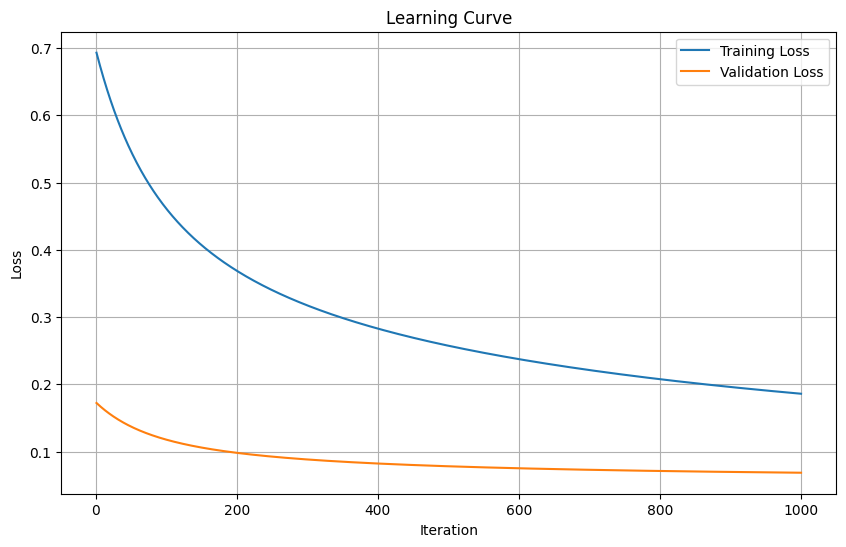

In [ ]:
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)
slr.fit(X_train_scaled, y_train, X_test_scaled, y_test)

plt.figure(figsize=(10, 6))
plt.plot(range(1, slr.iter + 1), slr.loss, label='Training Loss')
plt.plot(range(1, slr.iter + 1), slr.val_loss, label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

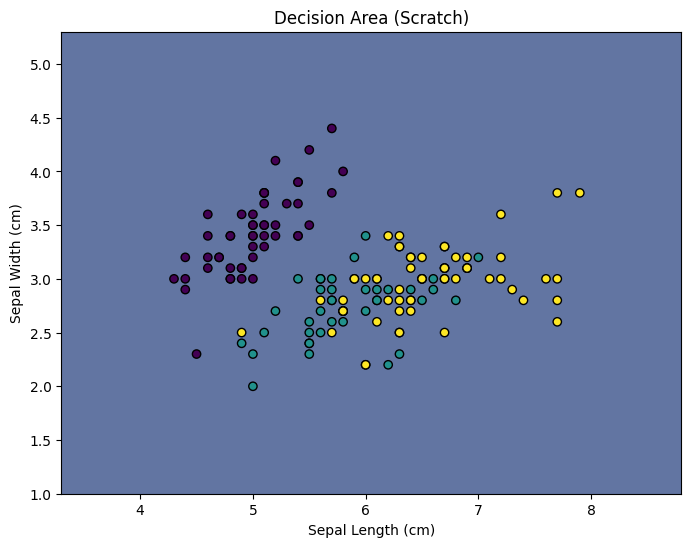

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_binary = X[(y == 1) | (y == 2)]
y_binary = y[(y == 1) | (y == 2)]
y_binary[y_binary == 2] = 0

class ScratchLogisticRegression:
    def __init__(self, num_iter, lr, bias, verbose):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose

        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features), optional
            Features of validation data
        y_val : ndarray, shape (n_samples,), optional
            Correct value of validation data
        """
        if self.verbose:
            print()

        self.coef_ = np.zeros(X.shape[1])

        m = X.shape[0]

        for i in range(self.iter):
            z = np.dot(X, self.coef_)
            h = self._sigmoid(z)

            reg_term = (self.lr / (2 * m)) * np.sum(self.coef_**2)
            J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + reg_term
            self.loss[i] = J

            gradient = (1 / m) * np.dot(X.T, (h - y)) + (self.lr / m) * self.coef_

            self.coef_ -= self.lr * gradient

            if X_val is not None and y_val is not None:
                z_val = np.dot(X_val, self.coef_)
                h_val = self._sigmoid(z_val)
                val_loss = -(1 / m) * np.sum(y_val * np.log(h_val) + (1 - y_val) * np.log(1 - h_val)) + reg_term
                self.val_loss[i] = val_loss

            if self.verbose:
                print(f"Iteration {i + 1}: Train Loss = {J}, Val Loss = {val_loss}")

        return self

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples

        Returns
        -------
        y_proba : ndarray, shape (n_samples,)
            Estimated probabilities
        """
        if self.bias:
            X_with_bias = np.c_[np.ones(X.shape[0]), X]
        else:
            X_with_bias = X
        z = np.dot(X_with_bias, self.coef_)
        y_proba = 1 / (1 + np.exp(-z))
        return y_proba

    def predict(self, X, threshold=0.5):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the samples
        threshold : float, default=0.5
            Threshold value for classification

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Estimated labels
        """
        y_proba = self.predict_proba(X)
        y_pred = (y_proba >= threshold).astype(int)
        return y_pred


X_pred = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]


slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)

slr.fit(X_train, y_train)


Z_scratch = slr.predict(X_pred)
Z_scratch = Z_scratch.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_scratch, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
plt.title('Decision Area (Scratch)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()